# Single Value Decomposition

The SVD algorithm as described in the README.md file compresses images by breaking them down into simpler parts and keeping only the most important features. I will be implementing the SVD algorithm based on the concepts taught in other CMOR classes to manipulate an image of a galaxy and dividing it up into its RBG channels.

In [26]:
from matplotlib import pyplot as plt
import numpy as np

In [27]:
#Scale the RGB values to the interval (0,1)
image_color = plt.imread('Data/svdimage.jpg')/255
# color images are 3D arrays
image_color.shape

(408, 612, 3)

<function matplotlib.pyplot.show(close=None, block=None)>

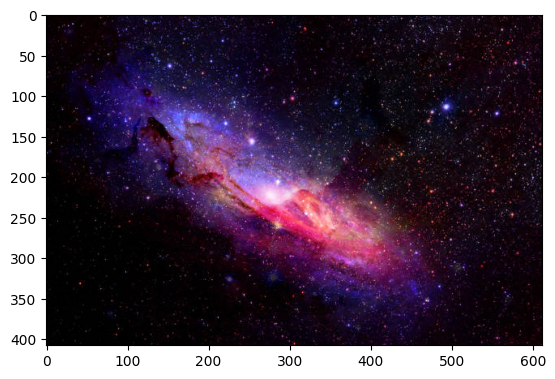

In [28]:
#display a color image
plt.imshow(image_color)
plt.show

In [29]:
# split color channels
R = image_color[:,:,0]
G = image_color[:,:,1]
B = image_color[:,:,2]

In [32]:
def svd_algorithm(A):
	[m,n] = np.shape(A)
	A = A.T
	[m,n] = np.shape(A)

	[S,V] = np.linalg.eig(A.T@A) # compute eigenvalues(S) and eigenvectors(V) of A^T A
	np.allclose(V@np.diag(S)@V.T,A.T@A)
	
	# rearrange V based on the order in eigenvalues
	order = np.repeat(np.argsort(S),n).reshape(n,n).T
	V = np.take_along_axis(V, order, axis=1)
	V = np.fliplr(V)
	
	# order eigenvalues
	S = np.flip(np.sort(S))
	
	# compute singular values
	sigma = np.sqrt(S)
	
	# define a maximum r such that sigma[r]>0
	r=0
	for i in range(0,n):
		if np.abs(sigma[r])>0.001:
			r=r+1		
	print(f"r = {r}")
	
	# compute U
	U=np.zeros((m,r))
	for i in range(0,r):
		U[:,i] = 1/sigma[i]*A@V[:,i]
	
	return U, sigma, V, r

In [ ]:
# calculate SVD for red
print(f"\033[1mRed Channel\033[0m")
UR, sR, VR, rR = svd_algorithm(R)
# SVD calculated with np.linalg.svd
UR_true, sR_true, VR_true = np.linalg.svd(R)
print(f"Command - Algorithm Error: {np.linalg.norm(sR_true-sR)}")

Red Channel
r = 408
Command - Algorithm Error: 1.723986033488225e-12


In [34]:
# calculate SVD for green
print(f"\033[1mGreen Channel\033[0m")
UG, sG, VG, rG = svd_algorithm(G)
# SVD calculated with np.linalg.svd
UG_true, sG_true, VG_true = np.linalg.svd(G)
print(f"Command - Algorithm Error: {np.linalg.norm(sG_true-sG)}")

Green Channel
r = 408
Command - Algorithm Error: 3.065056058630834e-13


In [35]:
# calculate SVD for blue
print(f"\033[1mBlue Channel\033[0m")
UB, sB, VB, rB = svd_algorithm(B)
# SVD calculated with np.linalg.svd
UB_true, sB_true, VB_true = np.linalg.svd(B)
print(f"Command - Algorithm Error: {np.linalg.norm(sB_true-sB)}")

Blue Channel
r = 408
Command - Algorithm Error: 1.3103270209273696e-12


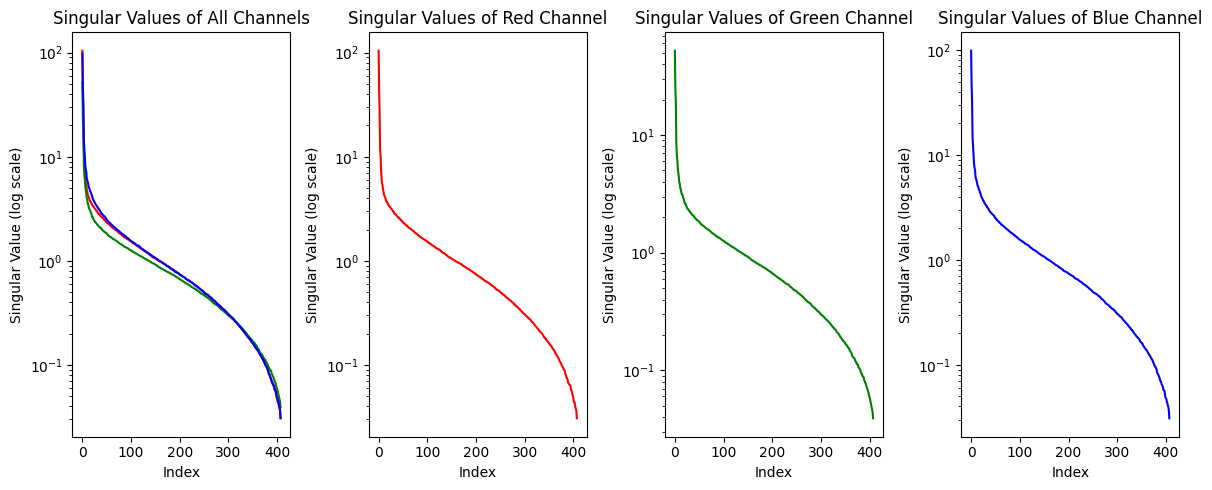

In [20]:
#graph the singular values for each color channel

plt.figure(figsize=(12, 5))

plt.subplot(1, 4, 1)
plt.yscale('log')
plt.plot(sR,'r')
plt.plot(sG,'g')
plt.plot(sB,'b')
plt.title('Singular Values of All Channels')
plt.xlabel('Index')
plt.ylabel('Singular Value (log scale)')

plt.subplot(1, 4, 2)
plt.yscale('log')
plt.plot(sR,'r')
plt.title('Singular Values of Red Channel')
plt.xlabel('Index')
plt.ylabel('Singular Value (log scale)')

plt.subplot(1, 4, 3)
plt.yscale('log')
plt.plot(sG,'g')
plt.title('Singular Values of Green Channel')
plt.xlabel('Index')
plt.ylabel('Singular Value (log scale)')

plt.subplot(1, 4, 4)
plt.yscale('log')
plt.plot(sB,'b')
plt.title('Singular Values of Blue Channel')
plt.xlabel('Index')
plt.ylabel('Singular Value (log scale)')

plt.tight_layout()
plt.show()

In [36]:
# compress an image with SVD based on an image compression factor

def compress_3D(A,compfactor):
	
	# SVD on the red channel
	[UR,SR,VR] = np.linalg.svd(A[:,:,0])
	nR=len(SR)
	rR = int(nR/compfactor) # reduced rank based on compression factor
	UR=UR[:,0:rR] # keep top singular values
	VR=VR[0:rR,:]
	SR=SR[0:rR]
	R_SVD = UR@np.diag(SR)@VR # reconstruct compressed red channel

	# green channel compression
	[UG,SG,VG] = np.linalg.svd(A[:,:,1])
	nG=len(SG)
	rG = int(nG/compfactor)
	UG=UG[:,0:rG]
	VG=VG[0:rG,:]
	SG=SG[0:rG]
	G_SVD = UG@np.diag(SG)@VG
	
	# blue channel compression
	[UB,SB,VB] = np.linalg.svd(A[:,:,2])
	nB=len(SB)
	rB = int(nB/compfactor)
	UB=UB[:,0:rB]
	VB=VB[0:rB,:]
	SB=SB[0:rB]
	B_SVD = UB@np.diag(SB)@VB
	
	final_image = np.dstack((R_SVD, G_SVD, B_SVD)) # stack channels together
	return final_image

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.10054469237146291..1.0484435369950296].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.09767238376643538..1.1435135497362987].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.10218602642240442..1.0837838542010407].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-9.22005527481673e-15..1.0000000000000042].


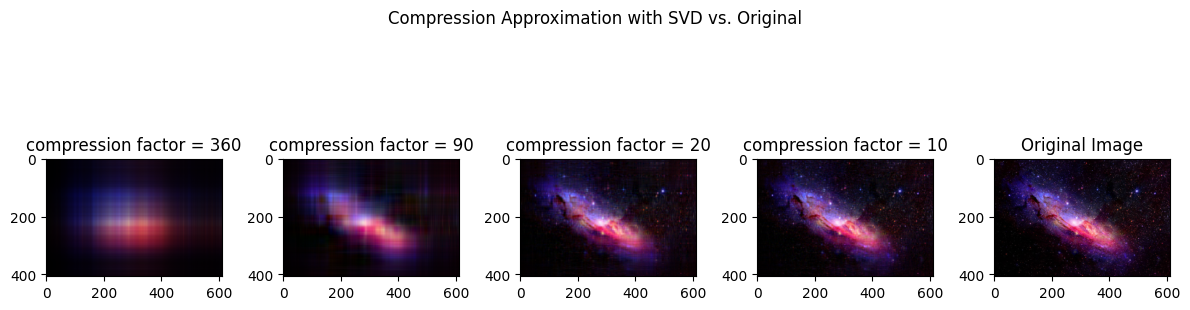

In [37]:
# compress the galaxy image using a factor of 360, 90, 20, 10

i=1 # initialize subplot index
values = np.array([360,90,20,10]) # compression factors
plt.figure(figsize=(12, 4))
plt.suptitle(f'Compression Approximation with SVD vs. Original')
for factor in values:
    Ar = compress_3D(image_color,factor)
    plt.subplot(1,5,i)
    plt.imshow(Ar)
    #total entries equals k*(m+n)*3, (m*k+n*k)*color channels
    plt.title(f'compression factor = {values[i-1]}')
    plt.tight_layout()
    i=i+1
Ar_or = compress_3D(image_color,1)
plt.subplot(1,5,5)
plt.imshow(Ar_or)
plt.title(f'Original Image')
plt.tight_layout()

### Conclusion

SVD allows us to compress images by breaking them down into simpler parts and keeping only the most important features. It is evident when the compression is large, the image is blurry and undiscernable. However, when the compression factor is smaller, it still allows us to understand the image without storing the full original matrix.